# Swarm-Induced Graph

Using 'robot' positions at each timestep, compute pair-wise distances.
Robots within a threshold distance of one another can communicate.

Galen Wilkerson

(using liquidfun robotics swarm by Calum Emrie, University of Edinburgh)

In [1]:
import pandas as pd

import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

#If you want all graphs to be drawn inline, then you can set a global parameter.
#from nxpd import draw
#from nxpd import nxpdParams
#nxpdParams['show'] = 'ipynb'

from IPython import display
from ipywidgets import interact

import scipy.spatial.distance
import networkx as nx

In [2]:
# read position data from file
df = pd.read_csv('./example_freeze', sep=' ', header=None)

# last column is junk
y = df.pop(500)

In [15]:
row = df.loc[0].values
row = row.reshape(250,2)

#plt.scatter(row[:,0], row[:,1], marker='.');


def update(timestamp = widgets.IntSlider(min=0,max=len(df),step=1,value=0), 
           distance_threshold = widgets.FloatSlider(min=0.01,max=7.5,step=.01,value=1)):
    
    row = df.loc[timestamp].values
    row = row.reshape(250,2)


    plt.figure(figsize=[10,10])
    plt.clf()

    plt.subplot(221)
    plt.scatter(row[:,0], row[:,1], marker='.');
    plt.title('positions')

    plt.subplot(222);
    
    # calculate pairwise distances


    X = row
    Y = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X, 'euclidean'))
    adj = Y < distance_threshold
    
    adj_mat = Y * adj.T
    
    G=nx.from_numpy_matrix(adj_mat)

    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    pos = dict(zip(range(len(row)), row))
    
    
    nx.draw(G, pos=pos, 
            node_size=3, 
            node_color = 'k',
            #edge_color='grey', 
            alpha=.5,
            edgelist=edges, 
            edge_color=1 - np.array(weights)/max(weights),
            edge_cmap=plt.cm.Blues);
    
    plt.title('connections')
    
    plt.subplot(223)
    plt.title('degree histogram')
    plt.scatter(range(len(nx.degree_histogram(G))),nx.degree_histogram(G), marker='.');
    
    plt.subplot(224)
    plt.title('distance histogram')
    plt.hist(Y.flatten(), bins = 50);
    

    if (nx.is_connected(G)):
        length = nx.average_shortest_path_length(G)
        print('average shortest path length', round(length, 3))
    
    largest_cc = max(nx.connected_components(G), key=len)
    print('largest component size', len(largest_cc))
    
interact(update);


interactive(children=(IntSlider(value=0, description='timestamp', max=102), FloatSlider(value=1.0, description…

## Evolution in time

In [91]:
distance_threshold = 1

largest_cc_sizes = []
average_shortest_path_lengths = []

for timestamp in range(len(df)):
    row = df.loc[timestamp].values
    row = row.reshape(250,2)

    # calculate pairwise distances


    X = row
    Y = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X, 'euclidean'))
    adj = Y < distance_threshold

    adj_mat = Y * adj.T

    G=nx.from_numpy_matrix(adj_mat)
    
    largest_cc = max(nx.connected_components(G), key=len)
    largest_cc_sizes.append(len(largest_cc))
    
    if (nx.is_connected(G)):
        length = nx.average_shortest_path_length(G)
        #print('average shortest path length', round(length, 3))
        average_shortest_path_lengths.append(length)
    else:
        average_shortest_path_lengths.append(-1)
    
    if (timestamp % 10 == 0):
        print('done: ', round(timestamp / len(df), 3) * 100, '%')

done:  0.0 %
done:  9.8 %
done:  19.6 %
done:  29.4 %
done:  39.2 %
done:  49.0 %
done:  58.8 %
done:  68.60000000000001 %
done:  78.4 %
done:  88.2 %
done:  98.0 %


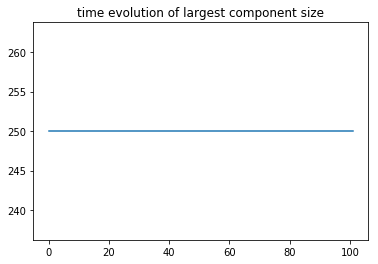

In [94]:
plt.plot(largest_cc_sizes);
plt.title('time evolution of largest component size');

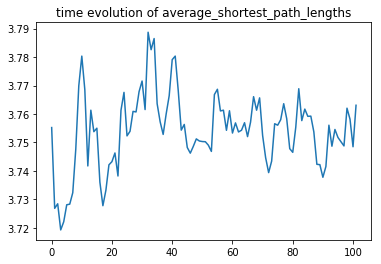

In [93]:
plt.plot(average_shortest_path_lengths);
plt.title('time evolution of average_shortest_path_lengths');

## Distance threshold effect on graph

In [ ]:
distance_thresholds =  np.arange(.1,4,.2)

# random timestamp
timestamp = np.random.choice(len(df))

largest_cc_sizes = []
average_shortest_path_lengths = []

for distance_threshold in distance_thresholds:
    row = df.loc[timestamp].values
    row = row.reshape(250,2)

    # calculate pairwise distances


    X = row
    Y = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X, 'euclidean'))
    adj = Y < distance_threshold

    adj_mat = Y * adj.T

    G=nx.from_numpy_matrix(adj_mat)
    
    largest_cc = max(nx.connected_components(G), key=len)
    largest_cc_sizes.append(len(largest_cc))
    
    if (nx.is_connected(G)):
        length = nx.average_shortest_path_length(G)
        #print('average shortest path length', round(length, 3))
        average_shortest_path_lengths.append(length)
    else:
        average_shortest_path_lengths.append(None)
    
    #print(distance_threshold)

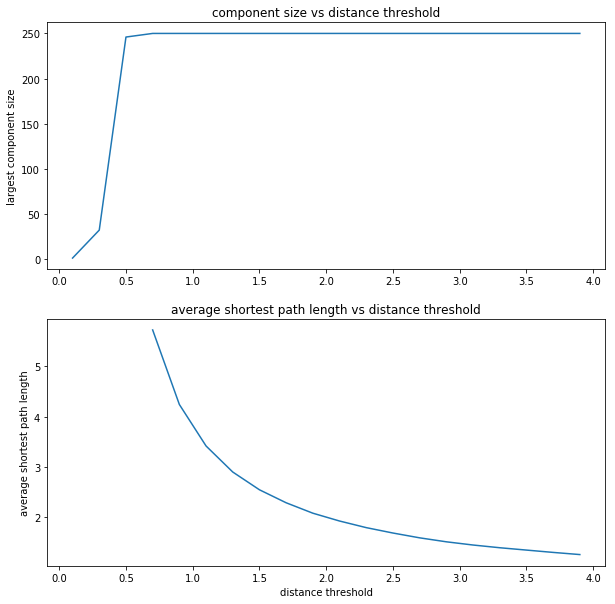

In [88]:
plt.figure(figsize=[10,10])
ax1 = plt.subplot(211)
plt.plot(distance_thresholds, largest_cc_sizes);
plt.ylabel('largest component size');
plt.title('component size vs distance threshold');
plt.setp(ax1.get_xticklabels(), fontsize=10);

# share x only
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(distance_thresholds, average_shortest_path_lengths);
plt.xlabel('distance threshold')
plt.ylabel('average shortest path length');
plt.title('average shortest path length vs distance threshold');
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=True);